# SI 618 Homework 9

### Overview

The purpose of this homework is to give you more experience with data aggregation in Python, visualization using plotnine, a grammar of graphics implementation almost identical to ggplot in R,  and time-series analysis on a real-world dataset. You will be analyzing Wikipedia page popularity over an 18 month period from July 2015 to December 2016. The dataset is from (https://www.kaggle.com/c/web-traffic-time-series-forecasting/data), but we have provided the CSV (page_views.csv) for you. We have also provided an example document (si618_hw9_solution.html) of the intended solution.

## Question 0: Loading data and preprocessing (5 points)

Load the data (page_views.csv) and remove NA values. (There are many ways to handle missing data, we choose to remove rows for the purpose of this assignment.) 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import geom_point, ggplot, aes, ggtitle, geom_line, geom_smooth, facet_grid, theme, stat_ecdf, scale_x_log10, labs

In [2]:
df_page = pd.read_csv("page_views.csv").dropna()
df_page.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


## Question 1: Average Popularity Analysis (20 points)

#### Question 1-a: Plot the distribution of the average popularity of pages. (10 points)

Hint: You can use stat_ecdf of plotnine to plot a CDF (cumulative distribution function) 

Hint2: You can use the mizani package to format the labels in the figure with commas.

Your plot should look something like this. Note that there is one data point that will be removed while creating this plot. This will happen due to the use of logarithmic scale. You can handle that in different ways. Given that this only affects one row, in this case we chose to ignore it. You can plot this distribution in linear scale first to see why logairthmic scale is needed.

In [3]:
df_average = df_page.set_index("Page").T
df_average = pd.DataFrame(df_average.mean().sort_values())

/home/panda/anaconda3/envs/SI618/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/panda/anaconda3/envs/SI618/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ecdf : Removed 1 rows containing non-finite values.


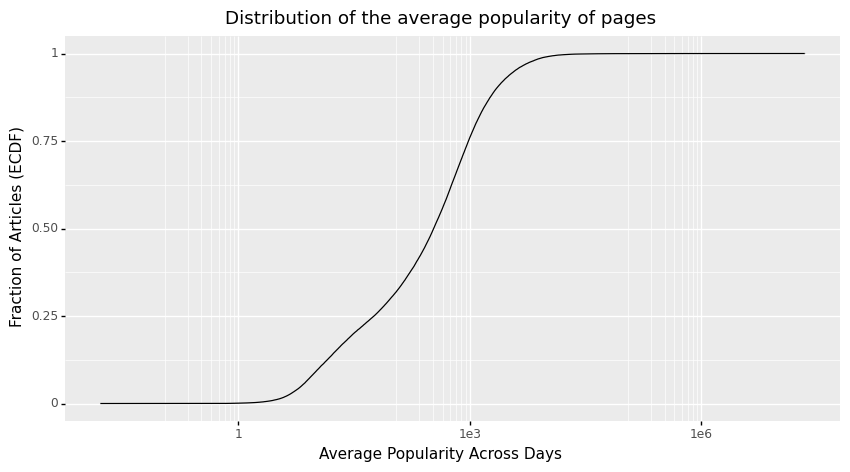

<ggplot: (8788821263574)>

In [4]:
df = df_average.reset_index().rename(columns={0: "Views"})
ggplot(aes(x="Views"), data=pd.DataFrame(df)) + stat_ecdf() + scale_x_log10() + theme(figure_size=(10,5)) + labs(title="Distribution of the average popularity of pages", x="Average Popularity Across Days", y="Fraction of Articles (ECDF)")

#### Question 1-b: What are the top-10 and bottom-10 pages with regards to popularity? (10 points)

In [5]:
print("Top 10 pages")
df = df_average[-10:][::-1].reset_index().rename(columns={0: "Views"})
df["Views"] = df["Views"].astype(int)
df

Top 10 pages


,Page,Views
0,Main_Page_en.wikipedia.org_all-access_all-agents,21938511
1,Main_Page_en.wikipedia.org_desktop_all-agents,15953631
2,Main_Page_en.wikipedia.org_mobile-web_all-agents,5734517
3,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2916244
4,Special:Search_en.wikipedia.org_all-access_all...,2371053
5,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,2023071
6,Заглавная_страница_ru.wikipedia.org_all-access...,1974580
7,Special:Search_en.wikipedia.org_desktop_all-ag...,1839723
8,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,1579055
9,Wikipedia:Portada_es.wikipedia.org_all-access_...,1366349


In [6]:
print("Bottom 10 pages")
df_average[:10].reset_index().rename(columns={0: "Views"})

Bottom 10 pages


,Page,Views
0,Special:EditWatchlist_www.mediawiki.org_all-ac...,0.000000
1,Especial:Seguimiento_es.wikipedia.org_all-acce...,0.016364
2,Служебная:Список_наблюдения_ru.wikipedia.org_a...,0.020000
3,Special:EditWatchlist_commons.wikimedia.org_al...,0.049091
4,Special:Preferences_www.mediawiki.org_all-acce...,0.050909
5,User:Willemnabuurs_commons.wikimedia.org_all-a...,0.056364
6,Special:Preferences_commons.wikimedia.org_all-...,0.067273
7,User:JurgenNL/speedy_commons.wikimedia.org_all...,0.069091
8,Special:OAuth/authorize_www.mediawiki.org_all-...,0.069091
9,User:Rotatebot/approx_max_wait_time_rotatelink...,0.089091


## Question 2: Day-of-the-week Effect (15 points)

Is there a day-of-the-week effect on Wikipedia? On average, which day sees the most Wikipedia views (total across all articles)? What about the least views?

In [7]:
df_sum = pd.DataFrame(df_page.set_index("Page").sum()).rename(columns={0:"Views"})
df_sum.index = pd.to_datetime(df_sum.index)
df_sum["Date"] = df_sum.index
df_sum["DayOfWeek"] = df_sum.index.dayofweek.map({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"})
df_sum["Date"] = df_sum.index.date
df_sum.groupby(["DayOfWeek"])["Views"].mean().apply(np.ceil).astype(int).sort_values(ascending=False)

DayOfWeek
Monday       191948745
Sunday       186714034
Tuesday      184840494
Wednesday    182450696
Thursday     178039319
Saturday     172645251
Friday       172204777
Name: Views, dtype: int64

I think there is a day of the week effect. We have most views on Monday while least on Friday.

## Question 3: Wikipedia views per day (30  points)

Plot Wikipedia views per day (total across all pages) over time. Then plot the de-seasonified data where the day-of-the-week effects are removed.

Hint: Use mizani package to get the correct formatting for the axis labels

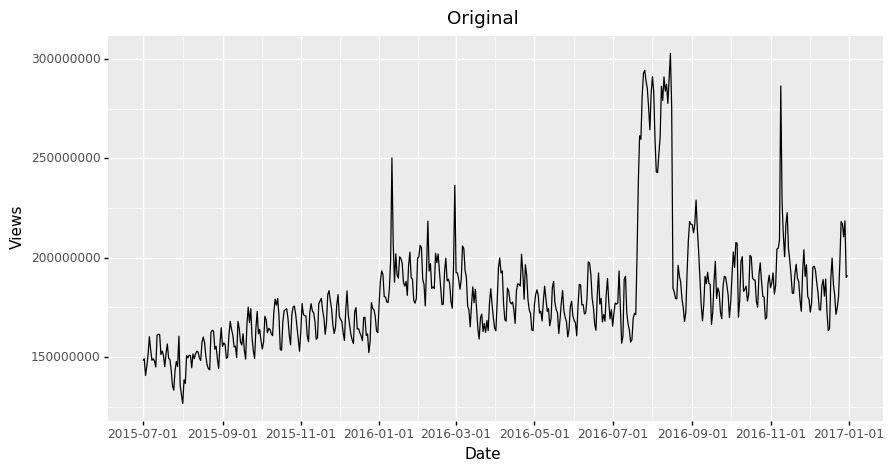

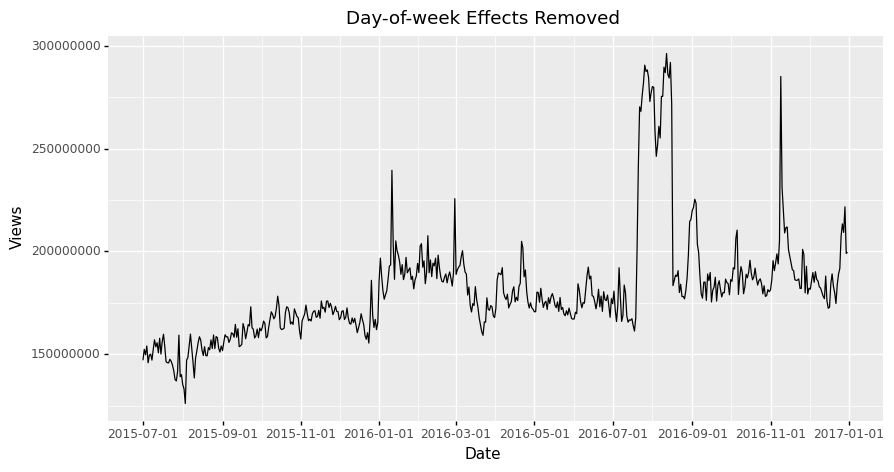

(<ggplot: (8788818819301)>, <ggplot: (8788818523892)>)

In [8]:
df = pd.DataFrame(df_page.set_index("Page").sum()).rename(columns={0:"Views"})
df.index = pd.to_datetime(df.index)
df["Date"] = df.index
df["DayOfWeek"] = df.index.dayofweek
p1 = ggplot(aes(x="Date", y="Views"), data=df) + geom_line(aes(group=1)) + theme(figure_size=(10,5)) + labs(title="Original")
model = smf.ols(data=df, formula="Views ~ C(DayOfWeek)").fit()
df["Views_ds"] = model.resid + df["Views"].mean()
p2 = ggplot(aes(x="Date", y="Views_ds"), data=df) + geom_line(aes(group=1)) + theme(figure_size=(10,5)) + labs(title="Day-of-week Effects Removed", y="Views")
p1, p2

## Question 4: Repeat Q3 for the top 50K articles (30 points)

Repeat Q3 for the top 50K articles. For this you will need to first find the top 50K pages and limit your dataset to those. We define these top pages as those with the largest number of overall page views. Next you need to find the day of the week effect for this subset and plot the two time series.

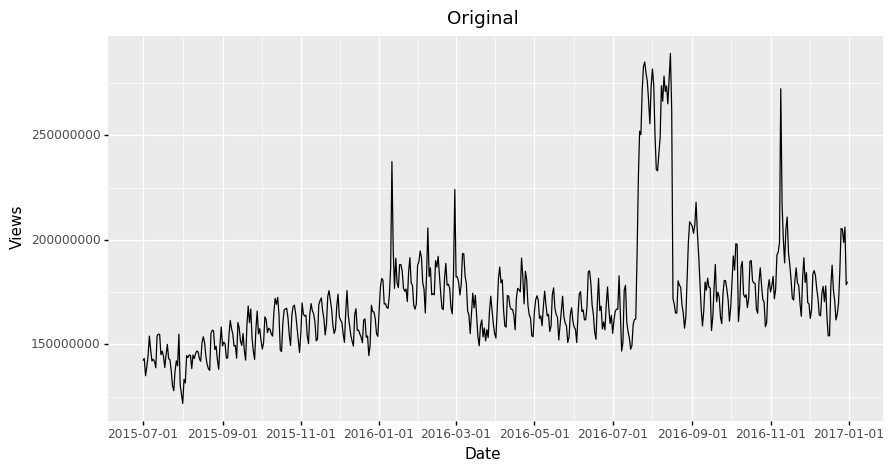

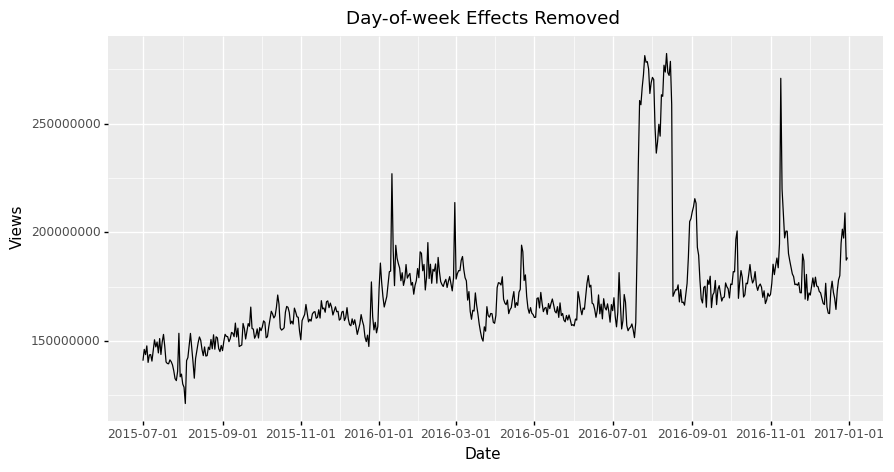

(<ggplot: (8788821335031)>, <ggplot: (8788821346807)>)

In [9]:
df = pd.DataFrame(df_page.set_index("Page").loc[df_average.index[-50000:]].sum()).rename(columns={0:"Views"})
df.index = pd.to_datetime(df.index)
df["Date"] = df.index
df["DayOfWeek"] = df.index.dayofweek
p1 = ggplot(aes(x="Date", y="Views"), data=df) + geom_line(aes(group=1)) + theme(figure_size=(10,5)) + labs(title="Original")
model = smf.ols(data=df, formula="Views ~ C(DayOfWeek)").fit()
df["Views_ds"] = model.resid + df["Views"].mean()
# + df["Views"].iloc[0] - model.resid.iloc[0]
p2 = ggplot(aes(x="Date", y="Views_ds"), data=df) + geom_line(aes(group=1)) + theme(figure_size=(10,5)) + labs(title="Day-of-week Effects Removed", y="Views")
p1, p2

## What to submit

* The jupyter notebook file named 'uniquename_si618_hw9.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_hw9_solution.html